In [13]:
import pandas as pd
df = pd.read_excel("Online Retail.xlsx")

In [14]:
df.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [17]:
df.dropna(subset=['CustomerID'], inplace=True)  # Remove transactions without customer ID
df = df[df['Quantity'] > 0]                      # Keep only positive quantities
df = df[df['UnitPrice'] > 0] 

In [19]:
# Add a new column for Total Purchase per transaction
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

In [21]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 397884 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397884 non-null  object        
 1   StockCode    397884 non-null  object        
 2   Description  397884 non-null  object        
 3   Quantity     397884 non-null  int64         
 4   InvoiceDate  397884 non-null  datetime64[ns]
 5   UnitPrice    397884 non-null  float64       
 6   CustomerID   397884 non-null  float64       
 7   Country      397884 non-null  object        
 8   TotalPrice   397884 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 30.4+ MB


## Top 10 Selling Products

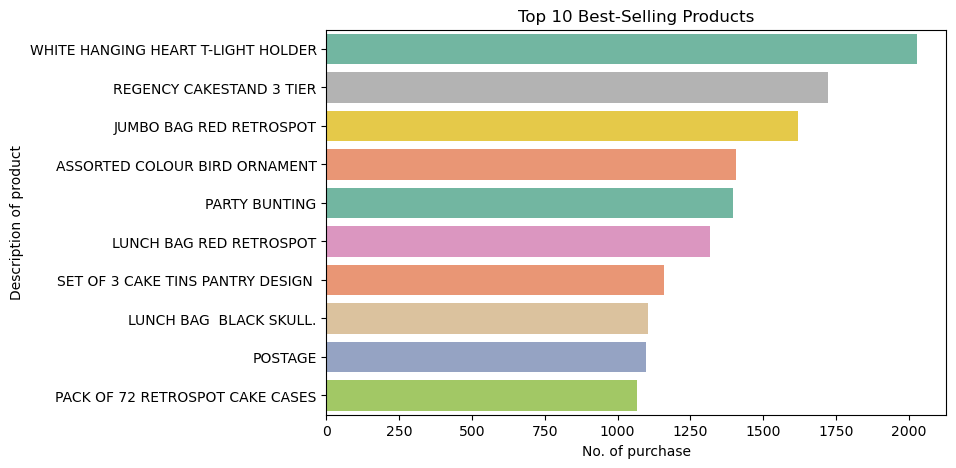

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

top_products = df['Description'].value_counts().head(10).index
plt.figure(figsize=(8,5))
sns.countplot(data=df[df['Description'].isin(top_products)],y='Description',order=top_products,palette='Set2', hue='Description' , legend=False)
plt.title("Top 10 Best-Selling Products")
plt.xlabel("No. of purchase")
plt.ylabel("Description of product")
plt.show()

## Average Spending for country

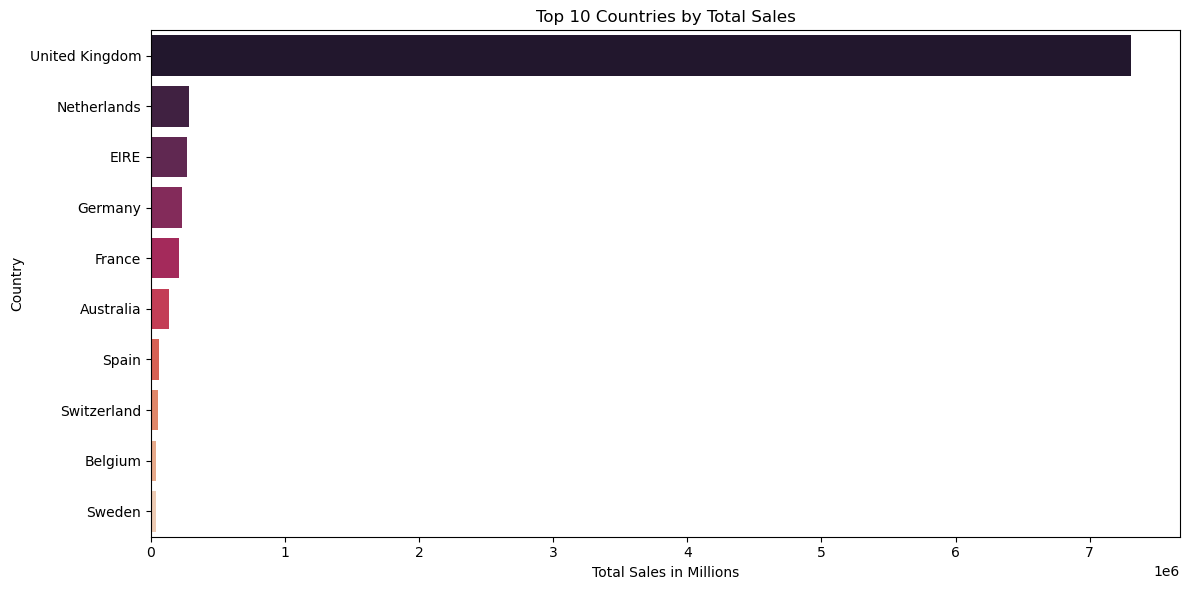

In [92]:
country_sales = df.groupby('Country')['TotalPrice'].sum().sort_values(ascending=False).head(10).reset_index()

plt.figure(figsize=(12,6))
sns.barplot(data=country_sales, x='TotalPrice', y='Country',palette='rocket', hue="Country", legend=False)
plt.title("Top 10 Countries by Total Sales")
plt.xlabel("Total Sales in Millions")
plt.ylabel("Country")
plt.tight_layout()
plt.show()

## Aggregate by month

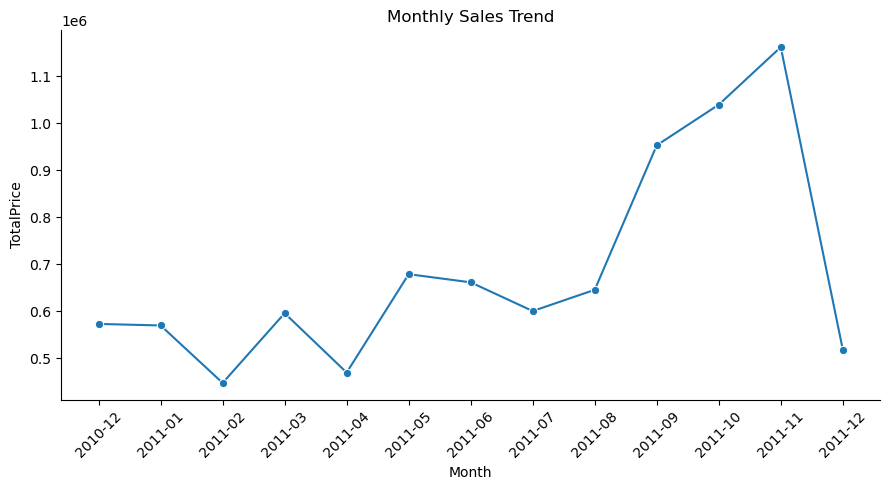

In [100]:
df['Month'] = df['InvoiceDate'].dt.to_period('M')
monthly_sales = df.groupby('Month')['TotalPrice'].sum().reset_index()
monthly_sales['Month'] = monthly_sales['Month'].astype(str)

sns.relplot(data=monthly_sales, x='Month', y='TotalPrice', kind='line', marker='o', height=5, aspect=1.8)
plt.xticks(rotation=45)
plt.title("Monthly Sales Trend")
plt.tight_layout()
plt.show()


## Preparing data for boxplots and point plots as customization

In [25]:
# Customization using seaborn
from matplotlib.ticker import FuncFormatter

# Global styling for charts
sns.set_style("whitegrid")        
sns.set_palette("Set2")            
sns.set_context("talk")            # Large elements for presentations

In [31]:
# Load and Clean Dataset
df = pd.read_excel("Online Retail.xlsx")
df.dropna(subset=['CustomerID'], inplace=True)
df = df[(df['Quantity'] > 0) & (df['UnitPrice'] > 0)]
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['Month'] = df['InvoiceDate'].dt.to_period('M').astype(str)

# Segment customers based on total spending
customer_df = df.groupby(['CustomerID', 'Country'])['TotalPrice'].sum().reset_index()
customer_df['Segment'] = pd.qcut(customer_df['TotalPrice'], 4, labels=['Low', 'Medium', 'High', 'VIP'])

## Box Plot — Spending Distribution by Segment & Country

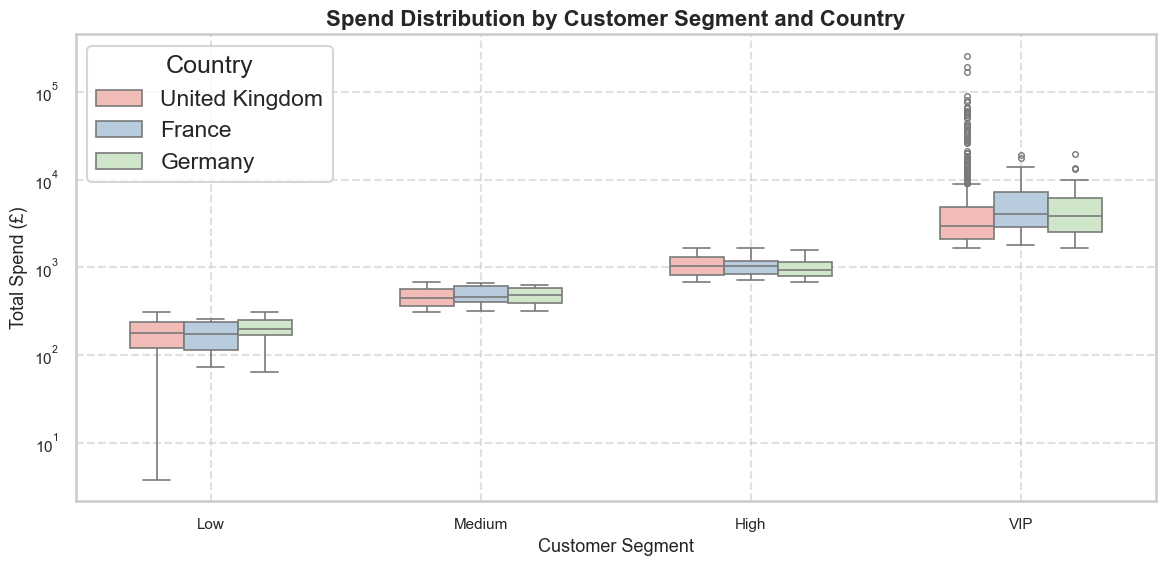

In [62]:
segment_order = ['Low', 'Medium', 'High', 'VIP']

# Filter relevant countries
filtered_df = customer_df[customer_df['Country'].isin(['United Kingdom', 'Germany', 'France'])]

plt.figure(figsize=(12, 6))
sns.boxplot(
    data=filtered_df,
    x='Segment',
    y='TotalPrice',
    hue='Country',
    order=segment_order,
    palette='Pastel1',
    width=0.6,
    fliersize=4,
    linewidth=1.2,
    whis=1.5
)

plt.title("Spend Distribution by Customer Segment and Country", fontsize=16, weight='bold')
plt.xlabel("Customer Segment", fontsize=13)
plt.ylabel("Total Spend (£)", fontsize=13)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.yscale("log")  # use log scale for better spread visibility
plt.legend(title='Country')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


## Point Plot — Avg Spend by Segment (No CI)

Text(0.5, 1.03, 'Average Customer Spend by Segment and Country')

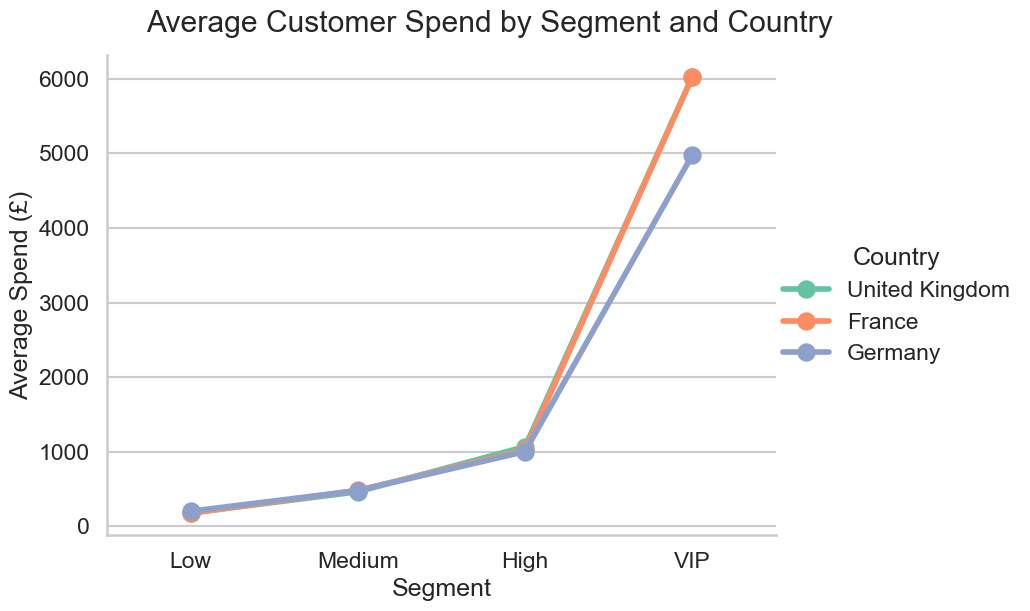

In [38]:
g2 = sns.catplot(
    data=customer_df[customer_df['Country'].isin(['United Kingdom', 'Germany', 'France'])],
    x='Segment',y='TotalPrice',kind='point',
    hue='Country',errorbar=None,              
    capsize=0.2,          # Little horizontal caps
    linestyle=None,           # Don't connect the dots
    height=6,
    aspect=1.4
)
g2.set_titles("Average Spend per Segment")
g2.set(xlabel="Segment", ylabel="Average Spend (£)")
g2.fig.suptitle("Average Customer Spend by Segment and Country", y=1.03)

## Custom Tick Formatting — Monthly Sales

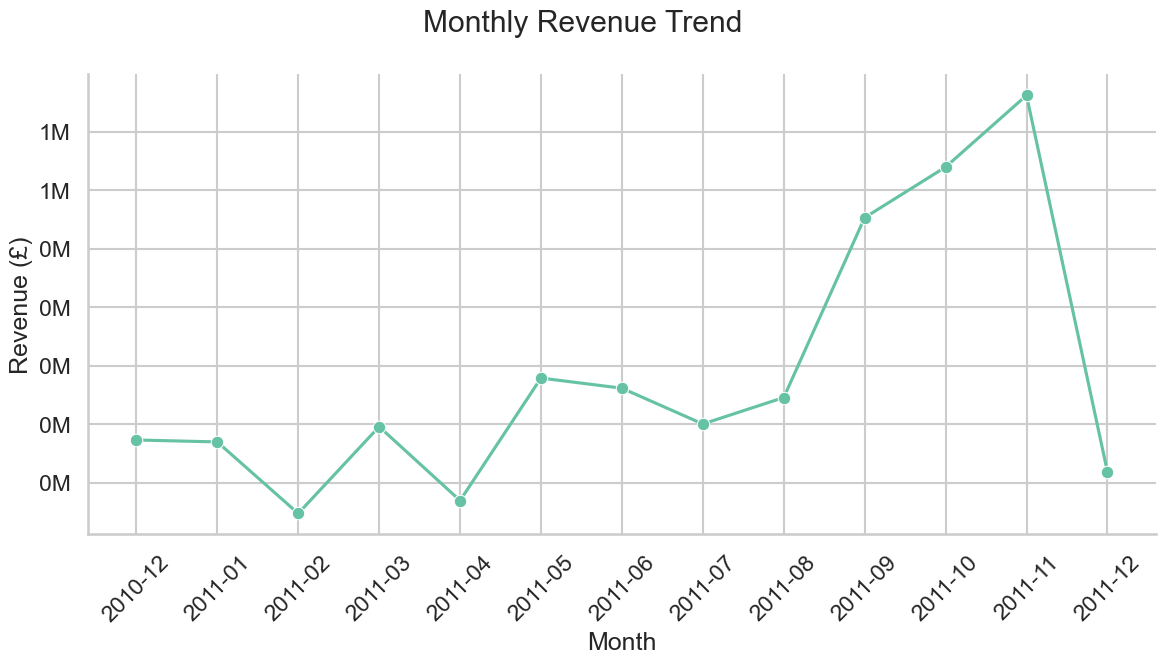

In [40]:
monthly_sales = df.groupby('Month')['TotalPrice'].sum().reset_index()

def format_millions(x, _):
    return f'{int(x / 1e6)}M'

g3 = sns.relplot(
    data=monthly_sales,x='Month',y='TotalPrice',kind='line',
    marker='o',
    height=6,
    aspect=2
)
g3.fig.suptitle("Monthly Revenue Trend", y=1.03)
g3.set(xlabel="Month", ylabel="Revenue (£)")
g3.ax.xaxis.set_tick_params(rotation=45)
g3.ax.yaxis.set_major_formatter(FuncFormatter(format_millions))